## **Classification on the Titanic Dataset**

**Description**: Build a logistic regression model to predict survival
on the Titanic based on passenger features like age, sex, and class.

**Skills**: Classification techniques, model evaluation, feature
engineering using Python and Scikit-learn.

To view the interactive EDA plotly plots click [here](https://deninjo.github.io/CODING-SAMURAI/)

### **Importing Libraries**

In [1943]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline


#html export
import plotly.io as pio
pio.renderers.default = 'notebook'

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we'll build a predictive model that answers the question: "What sorts of people were more likely to survive?"

In [1944]:
# loading dataset
train = pd.read_csv('Titanic-train.csv')
test = pd.read_csv('Titanic-test.csv')

In [1945]:
len(train), len(test)

(891, 418)

In [1946]:
# combining the two
df = pd.concat([train, test])

# Reset the index to keep it clean
df.reset_index(drop=True, inplace=True)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### **Columns and Description**

- **PassengerId**: A unique identifier for each passenger.  
- **Survived**: Survival indicator (0 = Did not survive, 1 = Survived).  
- **Pclass**: Passenger’s ticket class (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class); a proxy for socio-economic status.  
- **Name**: The full name of the passenger, including title (Mr., Mrs., Miss, etc.).  
- **Sex**: The gender of the passenger (male or female).  
- **Age**: The age of the passenger in years (fractions indicate months for infants).  
- **SibSp**: Number of siblings and/or spouses the passenger had aboard the Titanic.  
- **Parch**: Number of parents and/or children the passenger had aboard the Titanic.  
- **Ticket**: The ticket number assigned to the passenger.  
- **Fare**: The amount of money paid for the ticket.  
- **Cabin**: The cabin number where the passenger was accommodated.  
- **Embarked**: The port where the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton).  


In [1947]:
df[::200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S
1000,1001,0,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S
1200,1201,1,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S


In [1948]:
# categorical columns
categorical = ['survived', 'pclass', 'sex', 'embarked']

# numerical columns
numerical = ['age', 'sibsp', 'parch', 'fare']

# mixed columns
mixed = ['name', 'ticket', 'cabin' ]

In [1949]:
# column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### **Data Cleaning**

In [1950]:
# make column names and values uniform
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = df.dtypes[df.dtypes == 'object'].index
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')


df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"braund,_mr._owen_harris",male,22.0,1,0,a/5_21171,7.2500,NaN,s
1,2,1,1,"cumings,_mrs._john_bradley_(florence_briggs_th...",female,38.0,1,0,pc_17599,71.2833,c85,c
2,3,1,3,"heikkinen,_miss._laina",female,26.0,0,0,ston/o2._3101282,7.9250,NaN,s
3,4,1,1,"futrelle,_mrs._jacques_heath_(lily_may_peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen,_mr._william_henry",male,35.0,0,0,373450,8.0500,NaN,s


In [1951]:
# cheking for nulls
df.isna().sum()

passengerid       0
survived          0
pclass            0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
dtype: int64

In [1952]:
# percentage of nulls in embarked
((df['cabin'].isna().sum())/len(df)) * 100

77.46371275783041

Conclusions:<br>
There are missing values in Age, fare, cabin and embarked column <br>
Approximately 77% of the cabin column is blank, will have to be dropped <br>
The columns passengerid, name and ticket are irrelevant for building a predictive model hence will be dropped


In [1953]:
# duplicates
df.duplicated().sum()

0

There are no duplicates, seems the dataset is processed into a standardized state

In [1954]:
# dropping irrelevant rows
df = df.drop(columns=['cabin'])
df = df.drop(columns=['passengerid'])
df = df.drop(columns=['name'])
df = df.drop(columns=['ticket'])

In [1955]:
# cheking for nulls
df.isna().sum()

survived      0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

<Axes: ylabel='age'>

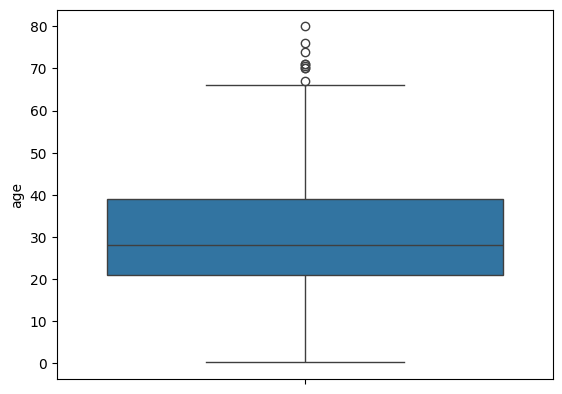

In [1956]:
# investigating age nulls

# box plot to visualize the spread and distribution of age
sns.boxplot(df['age'])

The age column has some outliers hence best to fill the nulls with median

In [1957]:
# filling age nulls
df['age'] = df['age'].fillna(df['age'].median())

In [1958]:
# investigating fare nulls
df[df['fare'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
1043,0,3,male,60.5,0,0,NaN,s


Seems our passenger with null fare  belongs to pclass 3 and embarked s port

In [1959]:
# deeper investigation of passengers with pclass 3 and embarked s port
null_fare = df[(df['pclass'] == 3) & (df['embarked'] == 's')]
null_fare

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,s
2,1,3,female,26.0,0,0,7.9250,s
4,0,3,male,35.0,0,0,8.0500,s
7,0,3,male,2.0,3,1,21.0750,s
8,1,3,female,27.0,0,2,11.1333,s
...,...,...,...,...,...,...,...,...
1300,1,3,female,3.0,1,1,13.7750,s
1303,1,3,female,28.0,0,0,7.7750,s
1304,0,3,male,28.0,0,0,8.0500,s
1306,0,3,male,38.5,0,0,7.2500,s


<Axes: ylabel='fare'>

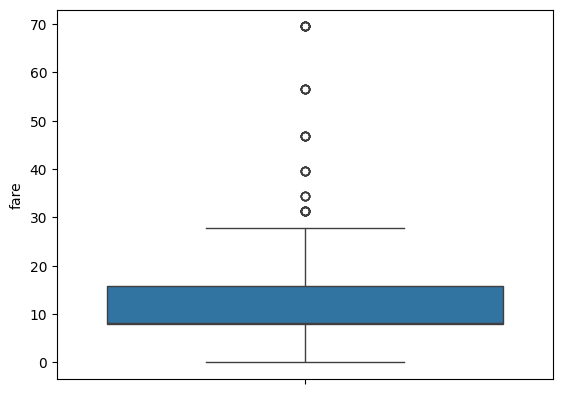

In [1960]:
# box plot to visualize the spread and distribution of fares of passengers with pclass 3 and embarked s port
sns.boxplot(null_fare['fare'])

There are some outliers in the distribution of fare from passengers who boarded from s port and pclass 3 so we fill the null with the median fare

In [1961]:
# filling age nulls
df['fare'] = df['fare'].fillna(null_fare['fare'].median())

In [1962]:
# investigating embarked nulls
df[df['embarked'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


Since there is no supporting info for the nulls, we go ahead and check the distribution of the values

In [1963]:
# spread of embarked values
df['embarked'].value_counts()

embarked
s    914
c    270
q    123
Name: count, dtype: int64

S port (Southampton) is the most appeared value in the embarked column hence safe to fill the nulls with that

In [1964]:
# filling embarked nulls
df['embarked'] = df['embarked'].fillna('s')

In [1965]:
# cheking for nulls
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

The dataset is now fully populated

In [1966]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,s
1,1,1,female,38.0,1,0,71.2833,c
2,1,3,female,26.0,0,0,7.9250,s
3,1,1,female,35.0,1,0,53.1000,s
4,0,3,male,35.0,0,0,8.0500,s


In [1967]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   pclass    1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


We could still modify some columns' data types

In [1968]:
#df['sex'] = (df.sex == 'male').astype(int)
df['sex'] = df['sex'].astype('category')
df['age'] = df['age'].astype(int)
df['embarked'] = df['embarked'].astype('category')
df['pclass'] = df['pclass'].astype('category')

In [1969]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  1309 non-null   int64   
 1   pclass    1309 non-null   category
 2   sex       1309 non-null   category
 3   age       1309 non-null   int32   
 4   sibsp     1309 non-null   int64   
 5   parch     1309 non-null   int64   
 6   fare      1309 non-null   float64 
 7   embarked  1309 non-null   category
dtypes: category(3), float64(1), int32(1), int64(3)
memory usage: 50.4 KB


There's a noticable decrease in memory usage

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### **Exploratory Data Analysis (EDA)**

Taking `survived` as our target variable

##### Survived column

In [1970]:
print(f"Out of {len(df)} passengers, only {round(df['survived'].mean() * 100, 2)}% survived")

Out of 1309 passengers, only 37.74% survived


There is clearly some class imbalance which may later affect our model

##### Survival with Pclass

In [1971]:
# survival vs pclass percentage
ct_percent = round(pd.crosstab(df['pclass'], df['survived'], normalize='index') * 100, 1)
ct_percent


survived,0,1
pclass,,
1,42.4,57.6
2,57.8,42.2
3,73.1,26.9


Conclusion: Pclass 3 was deadly as many people died from pclass 3. If you were in Pclass 1 you had higher chances of survival

##### Survival with Sex

In [1972]:
# survival vs sex
ct_percent = round(pd.crosstab(df['sex'], df['survived'], normalize='index') * 100, 1)
ct_percent

survived,0,1
sex,,
female,17.4,82.6
male,87.1,12.9


Conclusion: Many males died and many females survived

##### Survival with Embarked

In [1973]:
# survival vs embarked percentage
ct_percent = round(pd.crosstab(df['embarked'], df['survived'], normalize='index') * 100, 1)
ct_percent

survived,0,1
embarked,,
c,50.7,49.3
q,56.1,43.9
s,66.5,33.5


Conclusion: Embarked spots doesn't really say much about the survival rate

##### Survival with Age

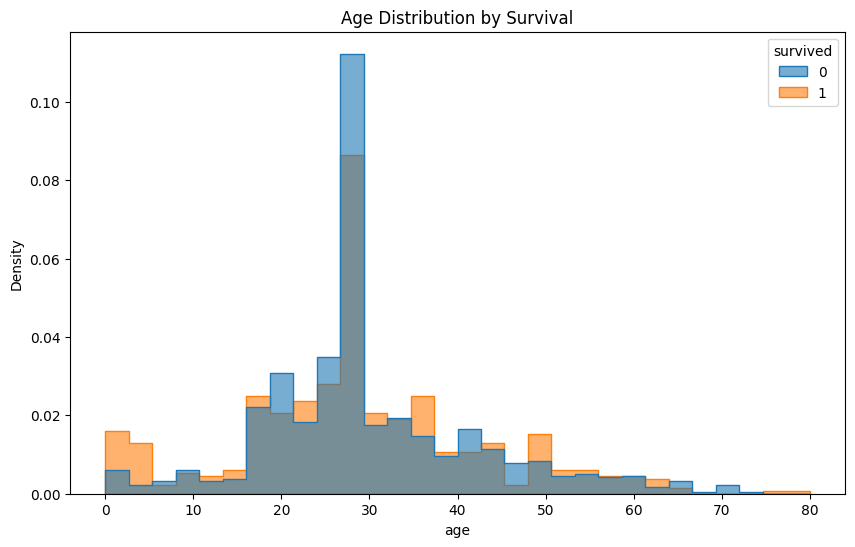

In [1974]:
# visualising age distribution by survival

plt.figure(figsize=(10,6))

# Histogram (density normalized)
sns.histplot(
    data=df, 
    x="age", 
    hue="survived", 
    bins=30, 
    stat="density",  # normalize to density
    element="step",  # overlapping style
    common_norm=False,  # avoid stacking
    alpha=0.6
)



plt.title("Age Distribution by Survival")
plt.show()

Conclusion: The majority of passengers were young adults, but within that group, more of them did not survive.

##### Survival with Fare

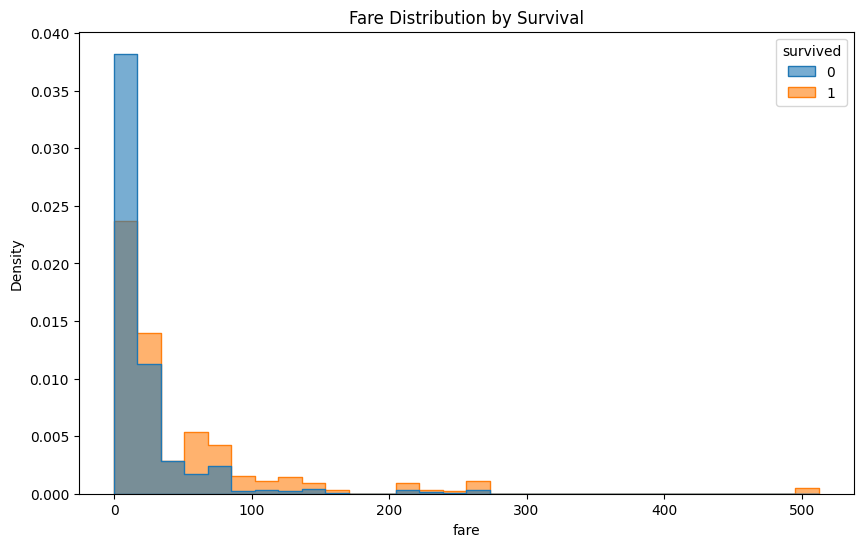

In [1975]:
# visualising fare distribution by survival

plt.figure(figsize=(10,6))

# Histogram (density normalized, overlay style)
sns.histplot(
    data=df, 
    x="fare", 
    hue="survived", 
    bins=30, 
    stat="density",    # same as histnorm="density"
    element="step",    # overlayed outlines
    common_norm=False, # keep densities separate
    alpha=0.6
)


plt.title("Fare Distribution by Survival")
plt.show()


Conclusion: Low-fare passengers mostly did not survive while higher-fare passengers had a better chance of survival.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### **Feature Engineering**

#### Creating and Modifying columns

In [1976]:
# we cr8 new column family size which is sum of sisp and parch columns
df3 = df.copy()
df3['family_size'] = df['parch'] + df['sibsp']
df3

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family_size
0,0,3,male,22,1,0,7.2500,s,1
1,1,1,female,38,1,0,71.2833,c,1
2,1,3,female,26,0,0,7.9250,s,0
3,1,1,female,35,1,0,53.1000,s,1
4,0,3,male,35,0,0,8.0500,s,0
...,...,...,...,...,...,...,...,...,...
1304,0,3,male,28,0,0,8.0500,s,0
1305,1,1,female,39,0,0,108.9000,c,0
1306,0,3,male,38,0,0,7.2500,s,0
1307,0,3,male,28,0,0,8.0500,s,0


In [1977]:
# we then cr8 another column 'family type' that will categorise the family sizes
def family_categorizer(number :int) -> str:
    if number == 0:
        return 'alone'
    elif 0 < number <= 4:
        return 'medium'
    else:
        return 'large'
    

df3['family_type'] = df3['family_size'].apply(family_categorizer)
df3.sample(7)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,family_size,family_type
913,1,1,female,28,0,0,31.6833,s,0,alone
1047,1,1,female,29,0,0,221.7792,s,0,alone
563,0,3,male,28,0,0,8.0500,s,0,alone
1151,0,3,male,36,1,0,17.4000,s,1,medium
220,1,3,male,16,0,0,8.0500,s,0,alone
122,0,2,male,32,1,0,30.0708,c,1,medium
78,1,2,male,0,0,2,29.0000,s,2,medium


In [1978]:
# dropping sibsp, parch and family size columns
df3 = df3.drop(columns=['sibsp', 'parch', 'family_size'])
df3.sample(7)

,survived,pclass,sex,age,fare,embarked,family_type
789,0,1,male,46,79.200,c,alone
936,0,3,male,25,7.925,s,alone
902,0,1,male,46,26.000,s,alone
357,0,2,female,38,13.000,s,alone
355,0,3,male,28,9.500,s,alone
12,0,3,male,20,8.050,s,alone
508,0,3,male,28,22.525,s,alone


Analysing new family type column's survival rate

In [1979]:
# survival vs family type percentage
ct_percent = round(pd.crosstab(df3['family_type'], df3['survived'], normalize='index') * 100, 1)
ct_percent


survived,0,1
family_type,,
alone,70.8,29.2
large,78.3,21.7
medium,45.5,54.5


Conclusion: Travelling solo will most likely result in one not surviving, the safer bet would be travelling in a medium sized family

In [1980]:
# we then cr8 another column 'family age group' that will categorise the ages
df4 = df3.copy()

def age_categorizer(age):
    if age <= 4:
        return "baby"
    elif age <= 12 and age>=5:
        return "child"
    elif age>=13 and age <= 19:
        return "teen"
    elif age>=20 and age <= 39:
        return "adult"
    elif age >=40 and age <= 59:
        return "middle_age_adult"
    else:
        return "senior_adult"
    
df4['age_group'] = df4['age'].apply(age_categorizer)

# dropping age columns
df4 = df4.drop(columns=['age'])



In [1981]:
df4.sample(7)

,survived,pclass,sex,fare,embarked,family_type,age_group
1006,0,3,male,14.4542,c,medium,teen
1189,0,1,male,45.5000,s,alone,adult
904,0,2,male,26.0000,s,medium,senior_adult
874,1,2,female,24.0000,c,medium,adult
1271,0,3,male,7.7500,q,alone,adult
751,1,3,male,12.4750,s,medium,child
983,1,1,female,52.0000,s,medium,adult


In [1982]:

# survival vs family type percentage
ct_percent = round(pd.crosstab(df4['age_group'], df4['survived'], normalize='index') * 100, 1)
ct_percent


survived,0,1
age_group,,
adult,64.7,35.3
baby,33.3,66.7
child,58.1,41.9
middle_age_adult,62.4,37.6
senior_adult,65.0,35.0
teen,58.0,42.0


Conclusion: Babies had the best survival rate and survival likelihood seems to decrease with age, consistent with the historical “women and children first” evacuation policy.

#### Encoding categorical columns

In [1983]:
# Label encoding is fine for ordinal data (where order matters), like: low, medium, high
from sklearn.preprocessing import OrdinalEncoder


#age_encoder = OrdinalEncoder(categories=[["baby", "child", "teen", "adult", "middle_age_adult", "senior_adult"]], dtype=int)

#df4[['age_group']] = age_encoder.fit_transform(df4[['age_group']])


In [1984]:
# one-hot encoding
encoded_df = pd.get_dummies(data=df3, columns=['sex', 'embarked', 'family_type'], drop_first=True, dtype=int)

encoded_df

,survived,pclass,age,fare,sex_male,embarked_q,embarked_s,family_type_large,family_type_medium
0,0,3,22,7.2500,1,0,1,0,1
1,1,1,38,71.2833,0,0,0,0,1
2,1,3,26,7.9250,0,0,1,0,0
3,1,1,35,53.1000,0,0,1,0,1
4,0,3,35,8.0500,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1304,0,3,28,8.0500,1,0,1,0,0
1305,1,1,39,108.9000,0,0,0,0,0
1306,0,3,38,7.2500,1,0,1,0,0
1307,0,3,28,8.0500,1,0,1,0,0


Note: In regression, when creating dummies do include `drop_first=True` as keeping all dummy columns creates duplicate information → regression can’t calculate unique coefficients (dummy variable trap). Simple rule of thumb: If a variable is a perfect combination of the others, drop it

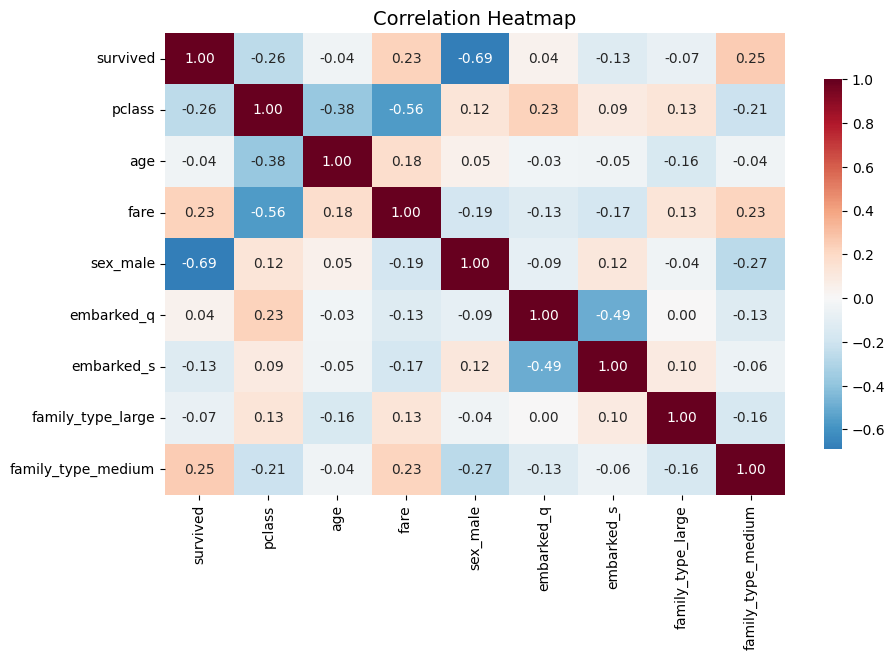

In [1985]:
# Compute correlation matrix
corr = encoded_df.corr()

# Set up the figure
plt.figure(figsize=(10, 6))

# Heatmap
sns.heatmap(
    corr,
    annot=True,           # show correlation values in the cells
    fmt=".2f",            # format to 2 decimal places
    cmap="RdBu_r",        # same as in Plotly
    center=0,             # make 0 the midpoint of colormap
    cbar_kws={"shrink": .8}  # shrink colorbar a bit
)

plt.title("Correlation Heatmap", fontsize=14)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### **Model Training**

When tackling a classification task like the Titanic dataset, the choice between black-box models (e.g. Neural Networks) and simple models (e.g., Logistic Regression, Decision Trees) depends on the goal.

Black-box models often provide higher accuracy because they capture complex patterns and interactions in the data. However, they sacrifice transparency: it’s difficult to explain why the model makes a given prediction. This limits their usefulness when the aim is to extract insights or explain results to non-technical stakeholders.

Simple models are easier to interpret. Logistic regression shows how each variable affects survival probability, and decision trees illustrate clear decision rules. These approaches might not squeeze out maximum accuracy, but they allow us to understand the drivers of survival—like gender, age, or class—directly from the model.

#### Setting up validation framework

In [1986]:
# splitting the data into 80% training, 20% testing
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(encoded_df, test_size=0.30, random_state=42)

len(train_dataset), len(test_dataset)

(916, 393)

#### Feature Scaling

Feature scaling means adjusting the range (and sometimes the distribution) of numerical features so that they’re on a comparable scale - It makes sure that one large-valued feature (like “fare = 500”) doesn’t dominate another small-valued feature (like “age = 20”).

In [1987]:
# feature scaling numerical columns to transform the data into a distribution with:
# A mean of 0
# A standard deviation of 1
from sklearn.preprocessing import StandardScaler

# numeric columns to scale 
num_cols = ['fare', 'age']

# Create and fit scaler ONLY on training data
scaler = StandardScaler()
scaler.fit(train_dataset[num_cols])  

# Use the SAME scaler to transform both
train_dataset[num_cols] = scaler.transform(train_dataset[num_cols])
test_dataset[num_cols] = scaler.transform(test_dataset[num_cols])

In [1988]:
train_dataset

,survived,pclass,age,fare,sex_male,embarked_q,embarked_s,family_type_large,family_type_medium
1214,0,1,0.284752,-0.136265,1,0,1,0,0
677,1,3,-0.902292,-0.475741,0,0,1,0,0
534,0,3,0.047344,-0.499700,0,0,1,0,0
1174,1,3,-1.614519,-0.365942,0,0,0,0,1
864,0,2,-0.427474,-0.411571,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1095,0,2,-0.348338,-0.462366,1,0,1,0,0
1130,1,1,1.471797,1.486624,0,0,0,0,1
1294,0,1,-0.981429,0.281267,1,0,1,0,0
860,0,3,0.917843,-0.389053,1,0,1,0,1


The scaled fare data is centered around the average, and measured in units of “how far from average” each value is.

In [1989]:
# resetting the index with new shuffled dataframe
train_dataset = train_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

# extracting our target variable
y_train = train_dataset['survived']
y_test = test_dataset['survived']

del train_dataset['survived']
del test_dataset['survived']


#### **Logistic Regression**

Basically, logistic regression is Linear regression + a squashing function (sigmoid) → turning raw score into probability.

In [1990]:
from sklearn.linear_model import LogisticRegression

# training our model
model = LogisticRegression()
model.fit(train_dataset, y_train)

LogisticRegression()

##### Model interpretation

In [1991]:
train_dataset.columns

Index(['pclass', 'age', 'fare', 'sex_male', 'embarked_q', 'embarked_s',
       'family_type_large', 'family_type_medium'],
      dtype='object')

In [1992]:
model.coef_.round(3)

array([[-0.809, -0.302,  0.104, -3.479, -0.028, -0.223, -1.416,  0.112]])

In [1993]:
# zipping each feature with its own weight to a dict
dict(zip(train_dataset.columns, model.coef_[0].round(3)))

{'pclass': -0.809,
 'age': -0.302,
 'fare': 0.104,
 'sex_male': -3.479,
 'embarked_q': -0.028,
 'embarked_s': -0.223,
 'family_type_large': -1.416,
 'family_type_medium': 0.112}

Conclusions:
- Sex (male) is the most influential factor → huge disadvantage as males have a high likelihood of not surviving
- Class (pclass_3 especially) also strongly reduces survival chances.
- Family size matters → large families fared worse, medium families slightly better.
- Embarkation port has weaker influence, but C (Cherbourg) seems relatively better than Q or S.
- Fare and age have smaller effects to the survival rate

#####  Model Evaluation

In [1994]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Make predictions
y_pred = model.predict(test_dataset)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print()
print()

# Generate classification report for the model
report = classification_report(y_test, y_pred)



print(report) 

Accuracy: 0.8676844783715013


              precision    recall  f1-score   support

           0       0.88      0.91      0.90       244
           1       0.84      0.80      0.82       149

    accuracy                           0.87       393
   macro avg       0.86      0.85      0.86       393
weighted avg       0.87      0.87      0.87       393



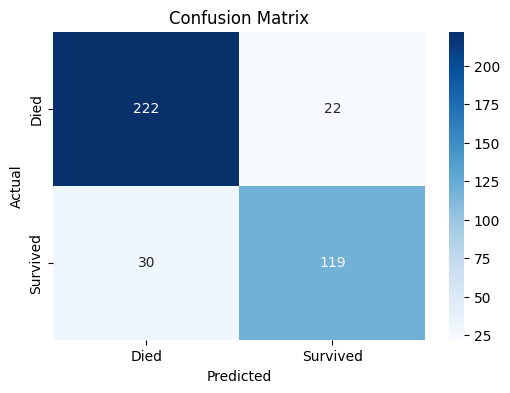

In [1995]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

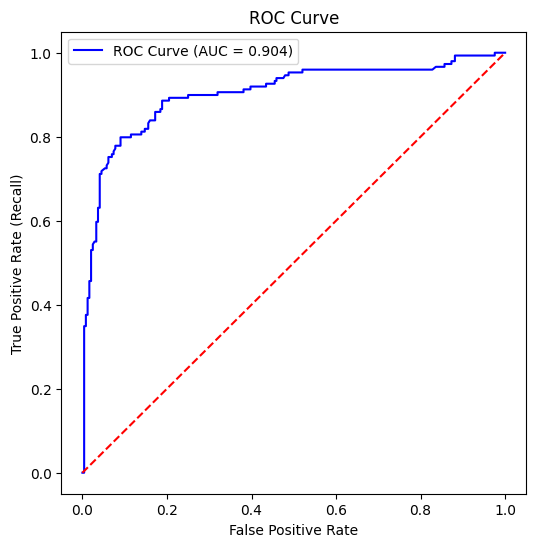

In [1996]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (survived = 1)
y_pred_proba = model.predict_proba(test_dataset)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()
